In [131]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('PJMW_hourly.csv', index_col='Datetime')
df.head()

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0


In [132]:
df.tail()

,PJMW_MW
Datetime,
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0
2018-01-01 23:00:00,7958.0
2018-01-02 00:00:00,7691.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143206 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJMW_MW  143206 non-null  float64
dtypes: float64(1)
memory usage: 2.2+ MB


In [134]:
df.index = pd.to_datetime(df.index)

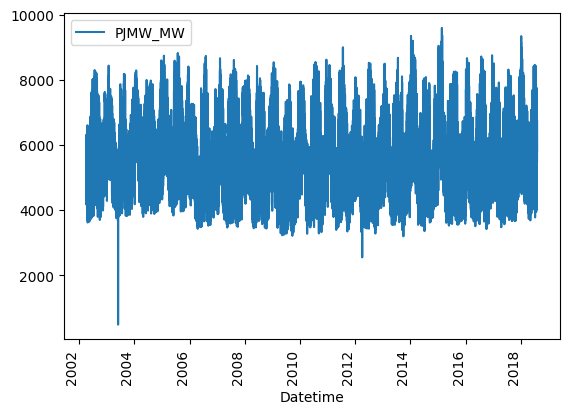

In [135]:
df.plot()
plt.xticks(rotation=90)
plt.show()

train test split

In [136]:
# < jan 2015 will be training, test data will be subsequent dates
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

In [137]:
train

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0
...,...
2014-01-01 20:00:00,6371.0
2014-01-01 21:00:00,6378.0
2014-01-01 22:00:00,6204.0


In [138]:
test

,PJMW_MW
Datetime,
2015-01-01 00:00:00,6365.0
2015-12-31 01:00:00,4530.0
2015-12-31 02:00:00,4383.0
2015-12-31 03:00:00,4299.0
2015-12-31 04:00:00,4338.0
...,...
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0


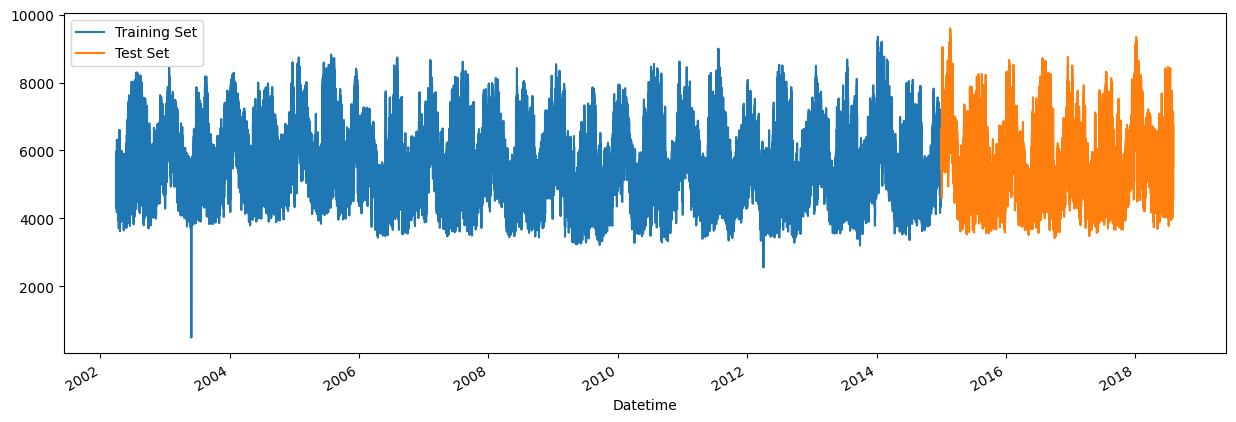

In [139]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
plt.legend(['Training Set', 'Test Set'])
plt.show()

<AxesSubplot:xlabel='Datetime'>

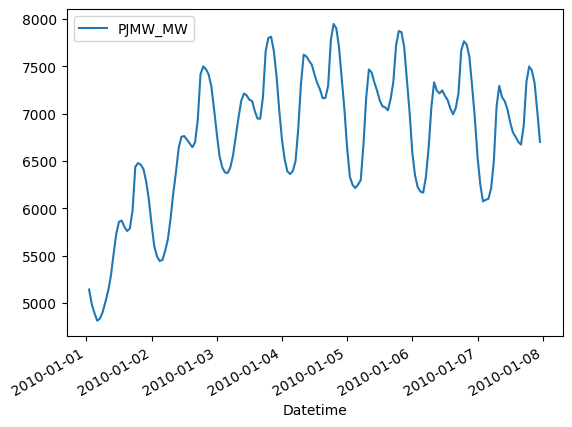

In [140]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot()

peak during day valley during night, new years holiday 1/1/2010 - many factories, workplaces closed hence lower figures

In [141]:
def create_time_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    return df

visualise feature target relationship

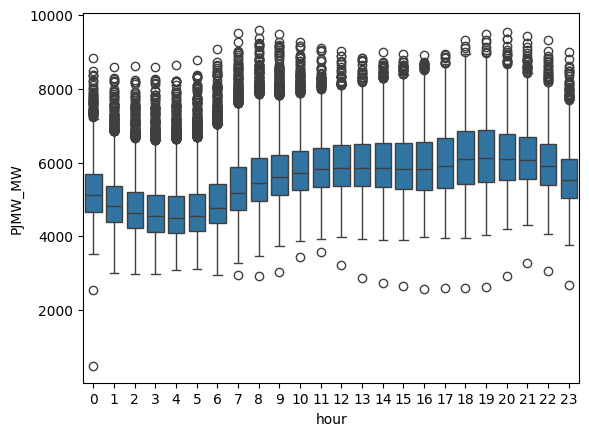

In [142]:
import seaborn as sns

df['hour'] = df.index.hour
sns.boxplot(data=df, x='hour', y='PJMW_MW')
plt.show()

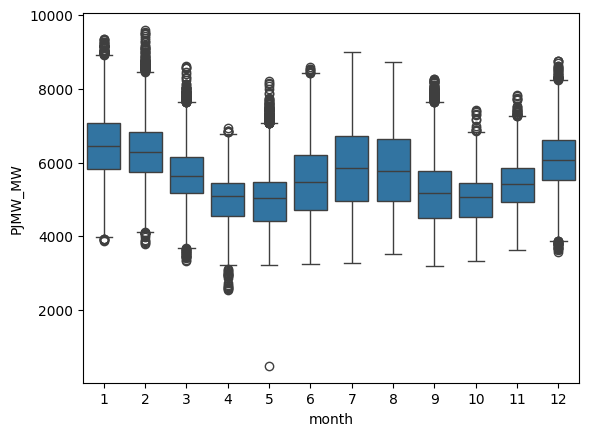

In [143]:
df['month'] = df.index.month
sns.boxplot(data=df, x='month', y='PJMW_MW')
plt.show()

In [144]:
train = create_time_features(train)
test = create_time_features(test)

FEATURES = ['hour', 'day_of_week', 'quarter', 'month', 'year']
TARGET = 'PJMW_MW'

In [145]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [146]:
from sklearn.metrics import mean_squared_error
# will give more penalty for predictions that are further away

%pip install xgboost
import xgboost as xgb

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\sbtop\appdata\local\programs\python\python39\lib\site-packages (2.0.0)




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-rmse:795.11904	validation_1-rmse:859.72069
[1]	validation_0-rmse:696.36060	validation_1-rmse:774.51483
[2]	validation_0-rmse:627.38444	validation_1-rmse:718.46420
[3]	validation_0-rmse:585.67523	validation_1-rmse:695.96687
[4]	validation_0-rmse:562.97923	validation_1-rmse:685.42957
[5]	validation_0-rmse:541.46076	validation_1-rmse:676.14476
[6]	validation_0-rmse:523.51490	validation_1-rmse:666.80166
[7]	validation_0-rmse:515.25520	validation_1-rmse:663.01650
[8]	validation_0-rmse:504.76328	validation_1-rmse:661.01314
[9]	validation_0-rmse:497.33392	validation_1-rmse:662.54414
[10]	validation_0-rmse:490.80793	validation_1-rmse:665.18632
[11]	validation_0-rmse:485.35466	validation_1-rmse:666.09805
[12]	validation_0-rmse:481.29030	validation_1-rmse:664.03226
[13]	validation_0-rmse:478.56550	validation_1-rmse:664.14859
[14]	validation_0-rmse:475.69573	validation_1-rmse:664.78941
[15]	validation_0-rmse:471.31041	validation_1-rmse:666.61448
[16]	validation_0-rmse:470.41370	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

test rmse goes up while train rmse goes down - overfitting

In [148]:
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-rmse:958.63591	validation_1-rmse:1022.64820
[1]	validation_0-rmse:952.66547	validation_1-rmse:1016.54688
[2]	validation_0-rmse:946.77718	validation_1-rmse:1010.50115
[3]	validation_0-rmse:940.97013	validation_1-rmse:1004.58740
[4]	validation_0-rmse:935.31913	validation_1-rmse:998.86815
[5]	validation_0-rmse:929.75476	validation_1-rmse:993.09445
[6]	validation_0-rmse:924.26843	validation_1-rmse:987.37822
[7]	validation_0-rmse:918.85927	validation_1-rmse:981.71499
[8]	validation_0-rmse:913.52453	validation_1-rmse:976.18116
[9]	validation_0-rmse:908.26591	validation_1-rmse:970.70128
[10]	validation_0-rmse:903.08093	validation_1-rmse:965.34759
[11]	validation_0-rmse:897.97046	validation_1-rmse:960.04012
[12]	validation_0-rmse:892.91656	validation_1-rmse:954.83557
[13]	validation_0-rmse:887.92413	validation_1-rmse:949.81001
[14]	validation_0-rmse:883.01026	validation_1-rmse:944.74283
[15]	validation_0-rmse:878.07724	validation_1-rmse:939.51329
[16]	validation_0-rmse:873.288

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

take a look at feature_importance

In [149]:
reg.feature_names_in_

array(['hour', 'day_of_week', 'quarter', 'month', 'year'], dtype='<U11')

In [150]:
reg.feature_importances_

array([0.4408811 , 0.12495478, 0.15340069, 0.2236587 , 0.0571047 ],
      dtype=float32)

forecast on test set

In [151]:
test['prediction'] = reg.predict(X_test)

In [152]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

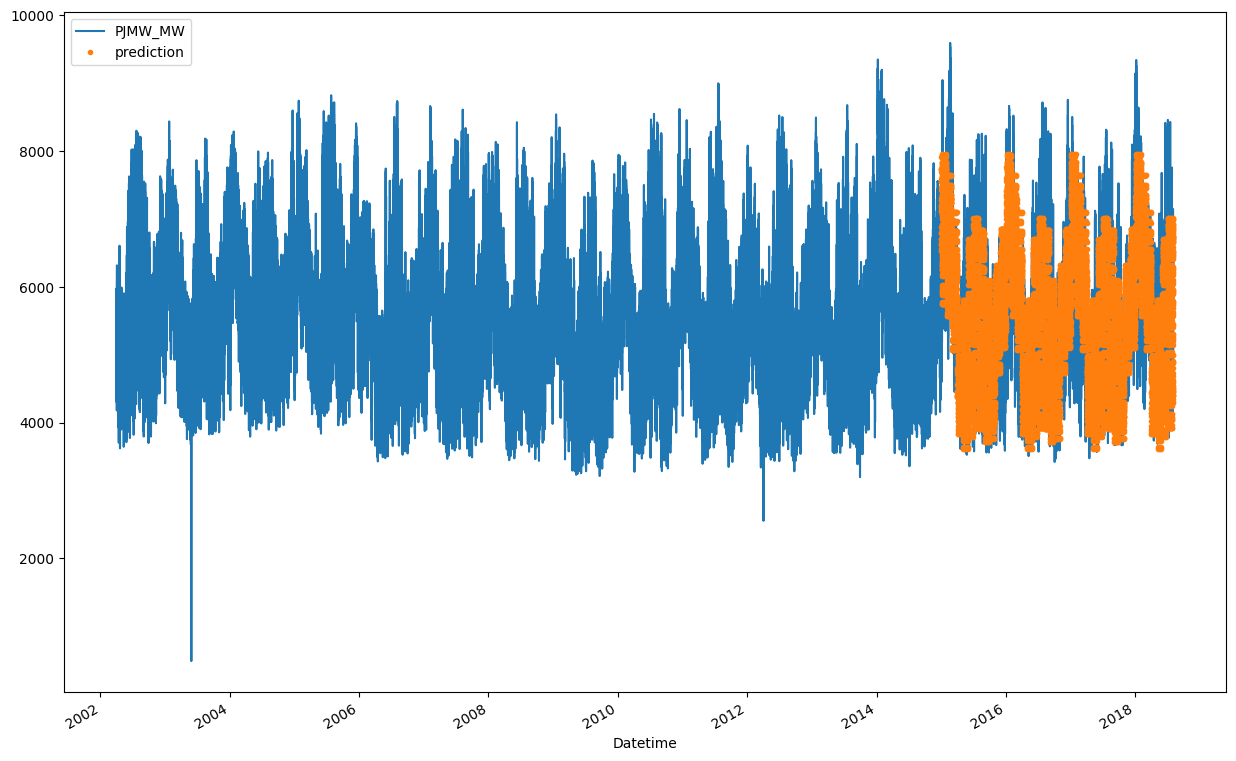

In [153]:
ax = df[['PJMW_MW']].plot(figsize=(15,10))
df[['prediction']].plot(ax=ax, style='.')
plt.show()

look at a single month

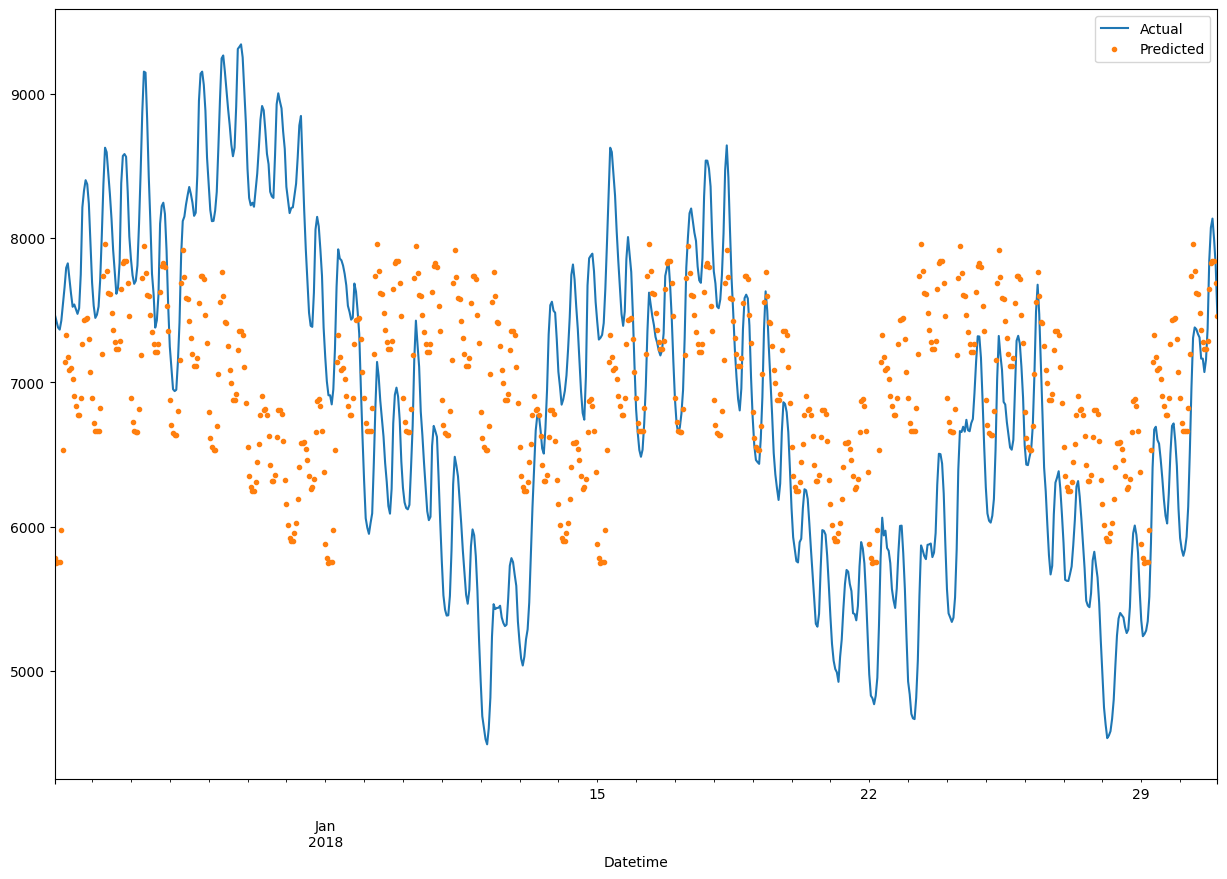

In [155]:
ax = df.loc[(df.index > '01-01-2018') & (df.index < '01-31-2018')]['PJMW_MW'].plot(figsize=(15,10))
df.loc[(df.index > '01-01-2018') & (df.index < '01-31-2018')]['prediction'].plot(style='.')
plt.legend(['Actual', 'Predicted'])
plt.show()

appears to follow trend with some error

In [157]:
import numpy as np
score = np.sqrt(mean_squared_error(test['PJMW_MW'], test['prediction']))
print(f'rmse score: {score:.4f}')

rmse score: 684.4817


In [159]:
test['abs_error'] = np.abs(test[TARGET] - test['prediction'])

In [160]:
test['date'] = test.index.date

In [162]:
test.groupby('date')['abs_error'].mean()

date
2015-01-01    1120.397909
2015-01-02     948.631755
2015-01-03     506.772685
2015-01-04    1127.665019
2015-01-05     318.612264
                 ...     
2018-07-30     382.632406
2018-07-31     266.236348
2018-08-01     179.488302
2018-08-02     131.861898
2018-08-03     255.138184
Name: abs_error, Length: 1311, dtype: float64

In [167]:
test.groupby('date')['abs_error'].mean().sort_values(ascending=False).head(20)

date
2015-02-15    2129.528931
2018-01-06    2034.810649
2017-02-23    1977.805583
2015-02-20    1960.769368
2017-02-24    1952.480632
2018-02-21    1942.438375
2015-02-16    1919.124837
2015-12-25    1886.720846
2017-01-12    1867.022909
2018-01-12    1830.048421
2017-02-22    1820.980042
2017-12-31    1803.229919
2015-12-24    1787.863770
2017-02-08    1762.980042
2018-02-20    1740.547302
2018-01-05    1720.743245
2016-12-16    1714.112488
2018-01-23    1706.085388
2017-01-25    1705.237630
2018-01-07    1701.418315
Name: abs_error, dtype: float64

In [168]:
test.groupby('date')['abs_error'].mean().sort_values(ascending=True).head(20)

date
2015-10-03    48.289785
2016-01-21    53.101034
2017-12-07    60.034546
2015-04-17    62.113892
2016-01-11    71.300822
2015-09-28    72.325480
2015-10-04    73.960093
2018-05-11    79.128255
2017-09-15    80.577820
2017-11-14    81.142171
2015-05-15    81.373210
2017-05-28    82.430196
2017-11-17    82.827657
2015-04-22    84.233114
2018-06-23    85.260966
2017-10-12    87.003316
2016-10-22    88.756358
2015-07-06    89.538818
2017-03-18    91.546611
2015-07-12    91.993988
Name: abs_error, dtype: float64

possible improvements: parameter tuning, account better for holidays (such as Christmas Day, New Year's Day). there appears to be a correlation between season and energy consumption, introduce weather data from the region to investigate this further.